### Build a Linear Regression model to predict median house values based on various features

#### Import Required Libraries

In [2]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

#### Load and Inspect the Dataset

In [3]:
housing=fetch_california_housing()
X=housing["data"]
y=housing["target"]
print(housing["feature_names"])
print(X.shape)
print(y.shape)
scaler=StandardScaler()
X=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
(20640, 8)
(20640,)


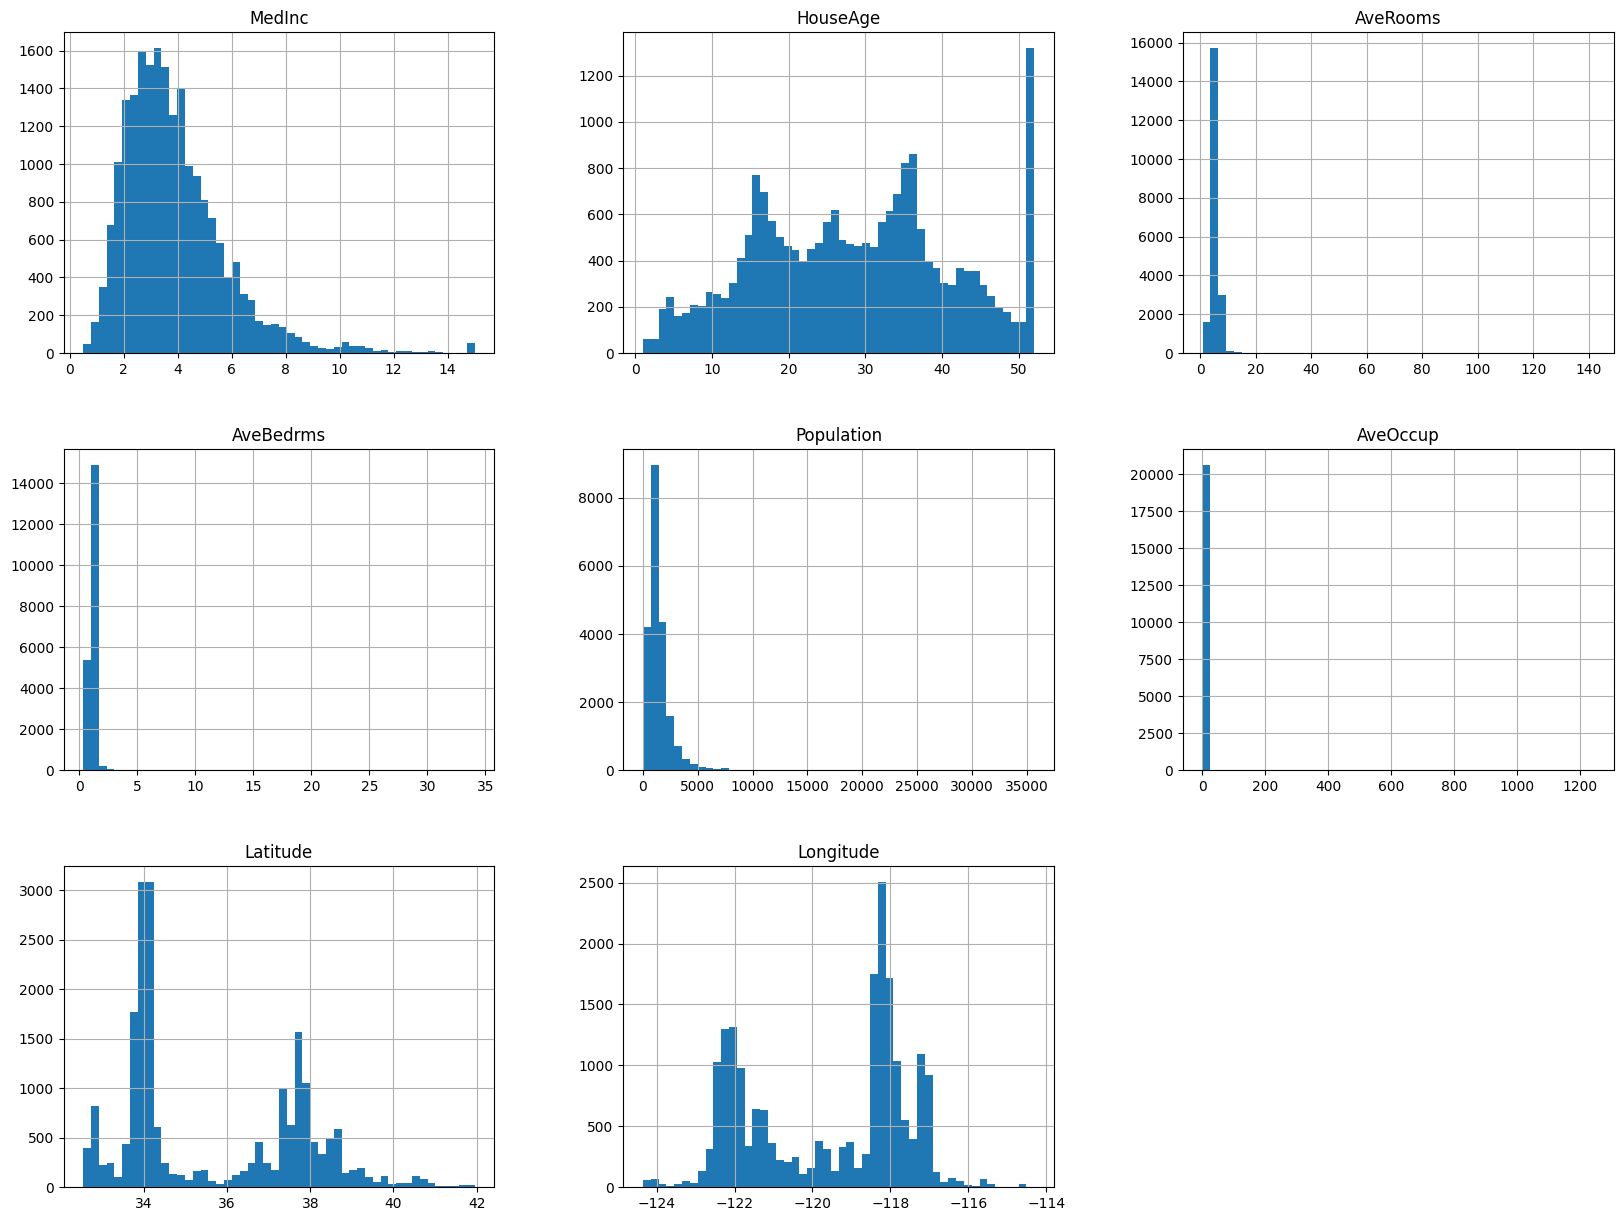

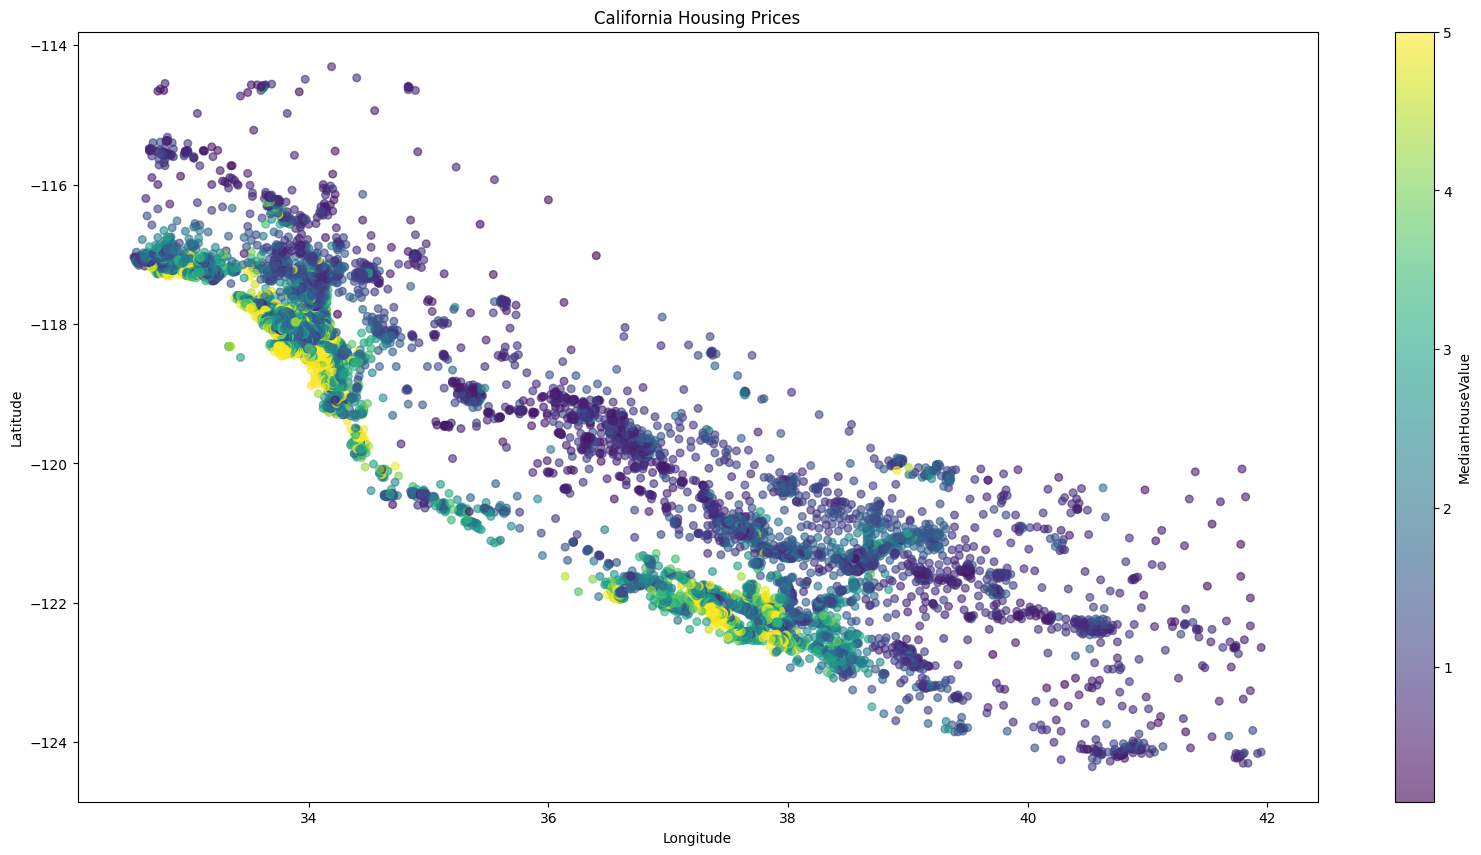

In [4]:
# visualization

X_vis=pd.DataFrame(housing['data'],columns=housing['feature_names'])
y_vis=pd.Series(housing['target'],name='MedianHouseValue')

X_vis.hist(bins=50,figsize=(20,15))

plt.figure(figsize=(20,10))
plt.scatter(X_vis['Latitude'],X_vis['Longitude'],c=y_vis,cmap='viridis',s=30, alpha=0.6)
plt.colorbar(label="MedianHouseValue")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California Housing Prices")
plt.show()

In [5]:
#define linear regression model

class LinearRegression:
  def __init__(self,lr=0.001,n_iters=1000):
    self.lr=lr
    self.n_iters=n_iters
    self.weights=None
    self.bias=None
  def fit(self,X,y): # for training
    n_samples,n_features=X.shape
    self.weights=np.zeros(n_features)
    self.bias=0
    for _ in range(self.n_iters):
      y_pred=np.dot(X,self.weights)+self.bias
      dw=(1/n_samples)*np.dot(X.T,(y_pred-y))
      db=(1/n_samples)*np.sum(y_pred-y)
      self.weights=self.weights-self.lr*dw
      self.bias=self.bias-self.lr*db


  def predict(self,X): # for testing
    print(f"Weights: {self.weights}")
    print(f"Bias: {self.bias}")
    y_pred=np.dot(X,self.weights)+self.bias
    return y_pred


In [6]:
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

regressor= LinearRegression(lr=0.001)
regressor.fit(X_train,y_train)
predictions=regressor.predict(X_test)

def mse(y_test,predictions):
  return np.mean((y_test-predictions)**2)

print(f"Mean Squared Error: {mse(y_test,predictions)}")


Weights: [ 0.49789394  0.09980749  0.07060884 -0.04245018 -0.00809256 -0.01933843
 -0.11162276 -0.07071373]
Bias: 1.3090949836256505
Mean Squared Error: 1.2982250260425015
